# Code to use the fastASD algorithm from Aoi & Pillow, 2017

In [1]:
cd ~/Documents/Current-Projects/fastASD/demos

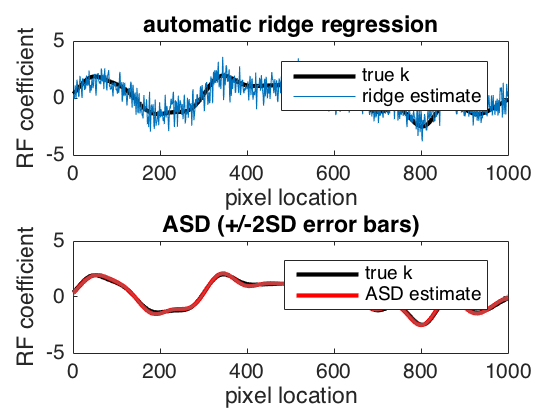

...Running ridge regression with fixed-point updates...
Finished autoRidgeRegression in #27 steps


...Running ASD...

compLSsuffstats_fourier:
 # filter freqs per stimulus dim: 97 
 Total # Fourier coeffs represented: 97

isotropic nd-ASD: terminated with rank of Cprior = 55
Elapsed time is 0.711696 seconds.

Hyerparam estimates (+/-1SD)
----------------------------
     l:  50.0   44.6 (+/-3.3)
   rho:   2.0    1.4 (+/-0.5)
nsevar: 100.0   99.5 (+/-6.5)

R-squared:
----------
  Ridge =  0.67
    ASD =  1.00


In [2]:
test_fastASD_1D

## Use on my own simulated data, 1D

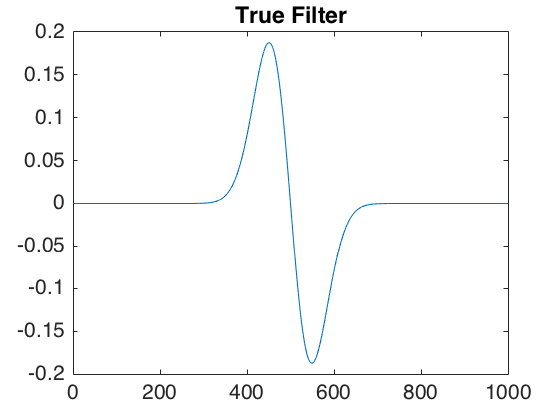

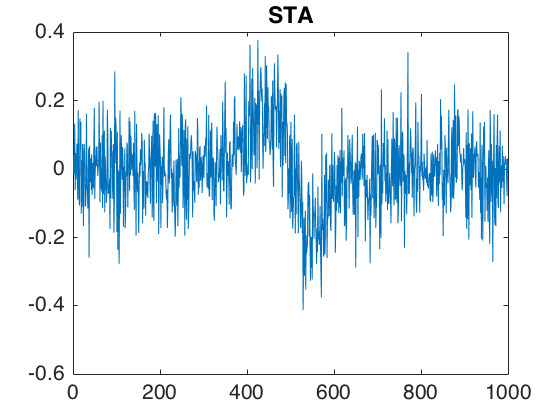

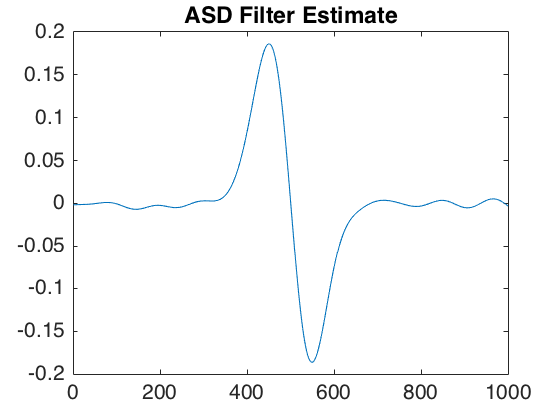

compLSsuffstats_fourier:
 # filter freqs per stimulus dim: 241 
 Total # Fourier coeffs represented: 241

isotropic nd-ASD: terminated with rank of Cprior = 45

R-squared for ASD: 1.00
R-squared for STA: 0.55
R-squared for MLE: 0.01


asdstats = 

          len: 54.8832
          rho: 0.0054
       nsevar: 0.1638
            H: [3x3 double]
           ci: [3x1 double]
     neglogEv: 319.6653
    Lpostdiag: [1000x1 double]


In [36]:
N = 500;DIM = 1000;
whiteData = normrnd(0,1,[N,DIM]);

filter = sin(2*pi*0.001*(1:DIM)).*exp(-((1:DIM)-N).^2/(2*50*50));

filterOutput = zeros(N,1);
for ii=1:N
    filterOutput(ii) = sum(whiteData(ii,:).*filter); 
end

filterOutput = filterOutput+normrnd(0,std(filterOutput)/5,[N,1]);

% calculate maximum likelihood estimate
estFilter = whiteData\filterOutput;

% calculate ML with expected value of covariance (basically, STA)
estFilter2 = (1/(var(whiteData(:))*N)).*whiteData'*filterOutput;

% calculate estimate using ASD
DIM = 1000;minL = 10;
[k_asd,asdstats] = fastASD(whiteData,filterOutput,DIM,minL);

figure;plot(k_asd);title('ASD Filter Estimate');
figure;plot(estFilter2);title('STA');
figure;plot(filter);title('True Filter');

[r,~] = corrcoef(k_asd,filter);
[r2,~] = corrcoef(estFilter2,filter);
[r3,~] = corrcoef(estFilter,filter);

fprintf('\nR-squared for ASD: %3.2f\n',r(1,2).*r(1,2));
fprintf('R-squared for STA: %3.2f\n',r2(1,2).*r(1,2));
fprintf('R-squared for MLE: %3.2f\n\n',r3(1,2).*r3(1,2));

asdstats

The maximum likelihood estimate and the STA are corrupted by noise, but ASD discovers the true filter almost perfectly.

## Simulated Data, 2D Spatial Filter with White Noise Stimuli

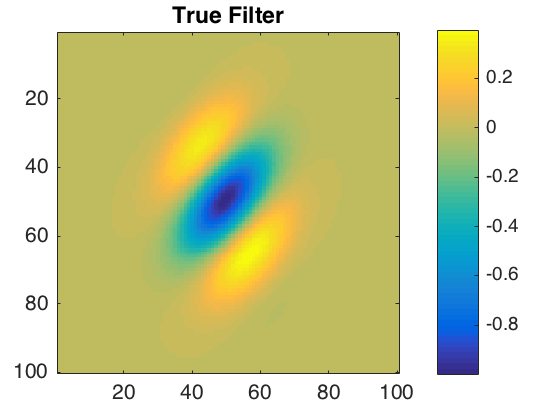

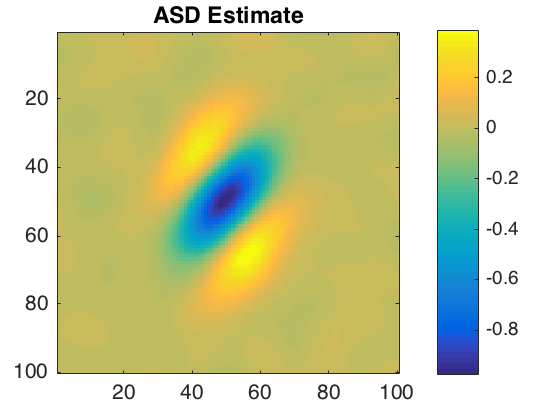

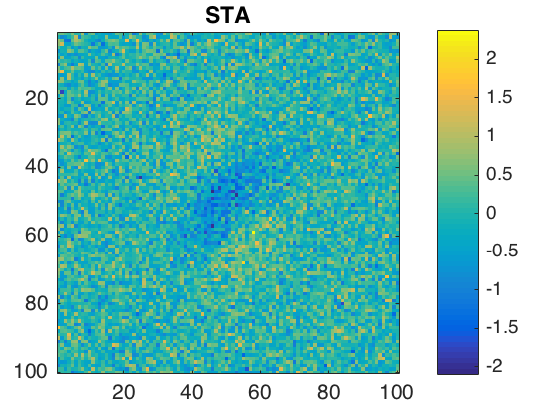

compLSsuffstats_fourier:
 # filter freqs per stimulus dim: 125  125 
 Total # Fourier coeffs represented: 15625

isotropic nd-ASD: terminated with rank of Cprior = 517
Elapsed time is 22.843988 seconds.


In [32]:
N = 1000;DIM = [100,100];

whiteData = normrnd(0,1,[N,DIM(1)*DIM(2)]);

[X,Y] = meshgrid(1:DIM(1),1:DIM(2));

orientVec = cos(pi/4-pi/2).*X-sin(pi/4-pi/2).*Y;
filter = exp(-(X-50).*(X-50)/(2*10*10)-(Y-50).*(Y-50)/(2*15*15)).*sin(2*pi*orientVec/40);

filterOutput = zeros(N,1);
for ii=1:N
    temp = reshape(whiteData(ii,:),DIM);
    filterOutput(ii) = sum(sum(temp.*filter)); 
end

filterOutput = filterOutput+normrnd(0,std(filterOutput)/5,[N,1]);

minLen = 1;
tic;
[k_asd,asdstats] = fastASD(whiteData,filterOutput,DIM,minLen);
toc;

estFilter = (1/(var(whiteData(:))*N)).*whiteData'*filterOutput;

figure;imagesc(reshape(estFilter,DIM));title('STA');colorbar;
figure;imagesc(reshape(k_asd,DIM));title('ASD Estimate');colorbar;
figure;imagesc(filter);title('True Filter');colorbar;

## Simulated Data, 2D Spatial Filter with Pink Noise Stimuli

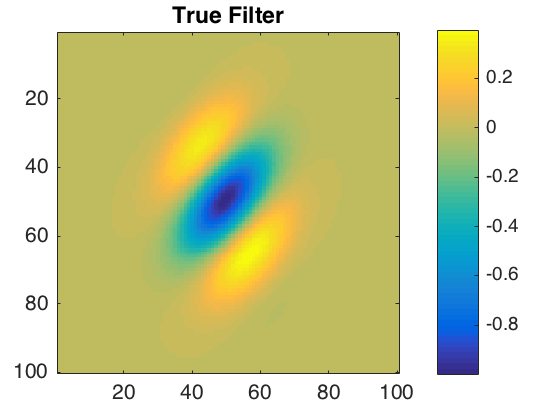

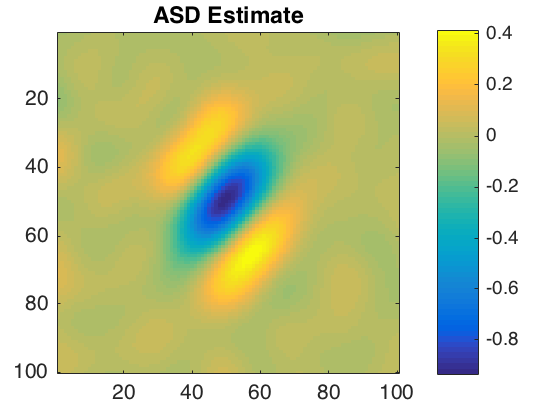

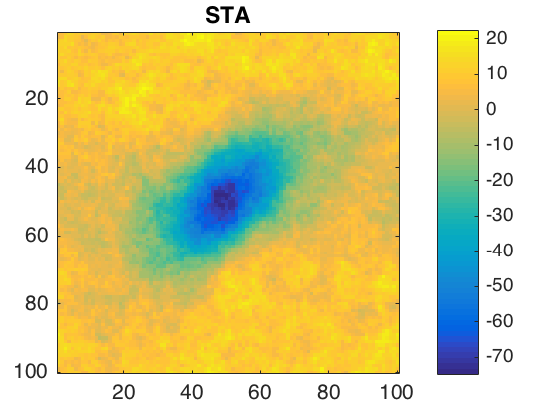

compLSsuffstats_fourier:
 # filter freqs per stimulus dim: 125  125 
 Total # Fourier coeffs represented: 15625

isotropic nd-ASD: terminated with rank of Cprior = 545
Elapsed time is 24.280905 seconds.


In [40]:
N = 1000;DIM = [100,100];

pinkData = zeros(N,DIM(1)*DIM(2));
whitenedData = zeros(N,DIM(1)*DIM(2));

[X,Y] = meshgrid(1:DIM(1),1:DIM(2));

orientVec = cos(pi/4-pi/2).*X-sin(pi/4-pi/2).*Y;
filter = exp(-(X-50).*(X-50)/(2*10*10)-(Y-50).*(Y-50)/(2*15*15)).*sin(2*pi*orientVec/40);

filterOutput = zeros(N,1);
for ii=1:N
    [temp1,temp2] = spatialPattern(DIM,-2);
    pinkData(ii,:) = temp1(:);
    whitenedData(ii,:) = temp2(:);
    filterOutput(ii) = sum(sum(temp1.*filter)); 
end

filterOutput = filterOutput+normrnd(0,std(filterOutput)/5,[N,1]);

minLen = 1;
tic;
[k_asd,asdstats] = fastASD(pinkData,filterOutput,DIM,minLen);
toc;

% [k_asd2,~] = fastASD(whitenedData,filterOutput,DIM,minLen);

estFilter = (1/(var(pinkData(:))*N)).*pinkData'*filterOutput;

figure;imagesc(reshape(estFilter,DIM));title('STA');colorbar;
% figure;imagesc(reshape(k_asd2,DIM));title('ASD Estimate with Pre-Whitened Data');colorbar;
figure;imagesc(reshape(k_asd,DIM));title('ASD Estimate');colorbar;
figure;imagesc(filter);title('True Filter');colorbar;